In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [3]:
from google.colab import files

# Upload file manually
uploaded = files.upload()

# Load dataset
df = pd.read_csv(next(iter(uploaded)))

Saving ASIANPAINT.csv to ASIANPAINT.csv


In [4]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN


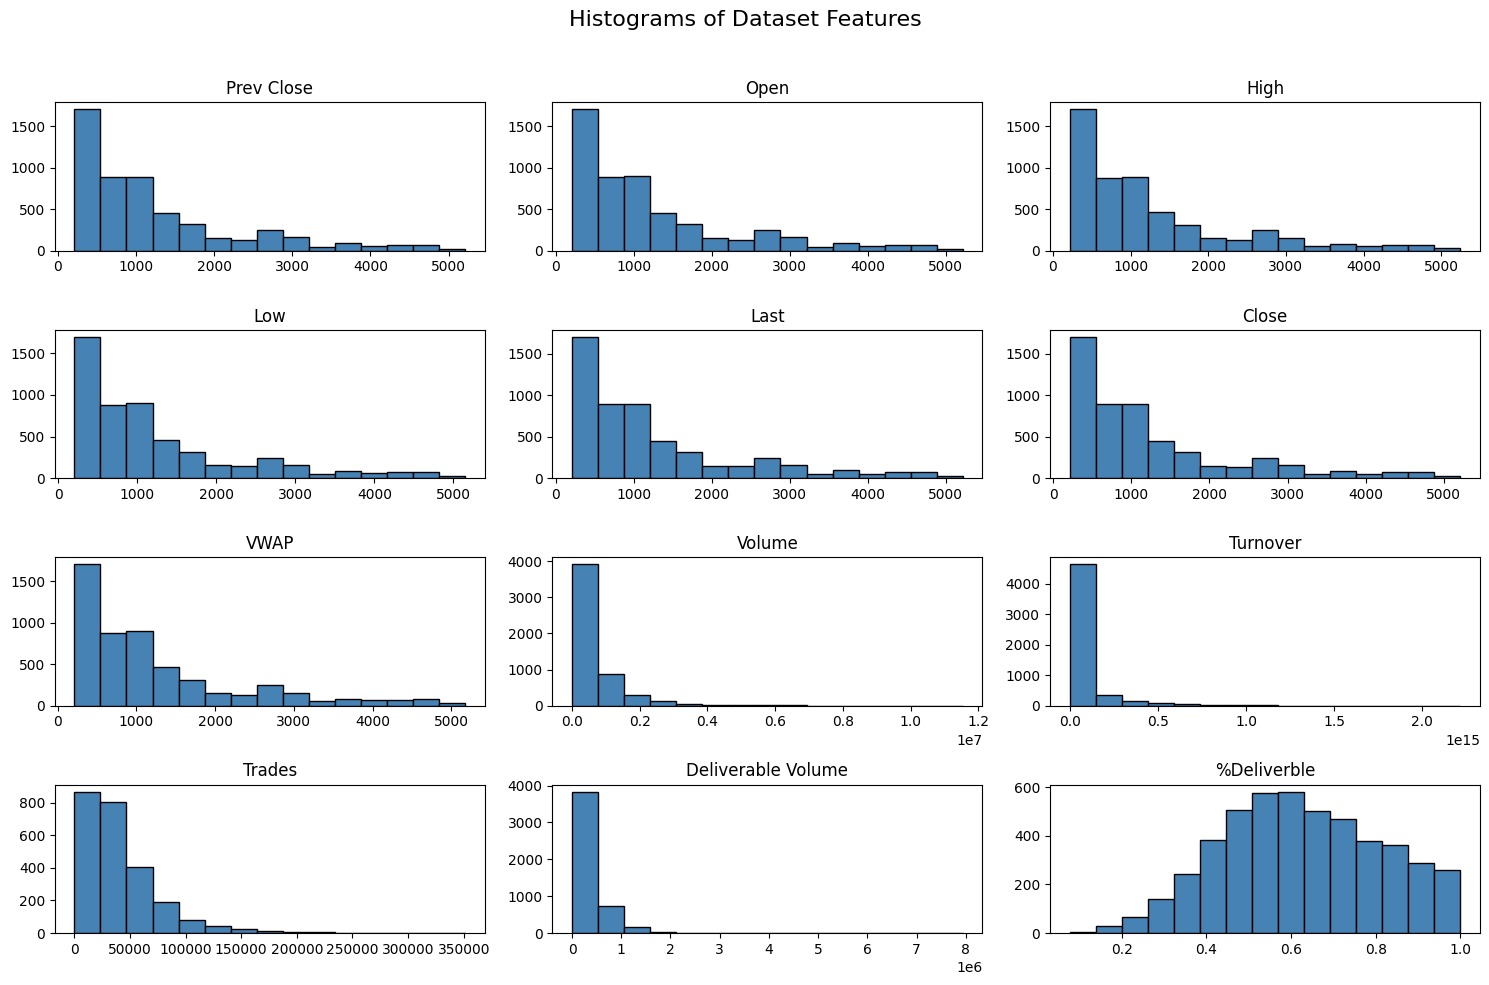

In [5]:
# Create histograms for each feature
df.hist(bins=15, figsize=(15, 10), color='steelblue', edgecolor='black', grid=False)

# Formatting
plt.suptitle('Histograms of Dataset Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [6]:
# Feature Engineering
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['Return'] = df['Close'].pct_change()
df['Volatility'] = df['Return'].rolling(window=5).std()
df.dropna(inplace=True)

In [7]:
# Selecting Features and Target
features = ['Open', 'High', 'Low', 'Prev Close', 'MA_5', 'MA_10', 'Volatility', 'Volume']
X = df[features]
y = df['Close']

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

In [9]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

# Calculate regression metrics
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
mape_lr = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE formula

# Print metrics
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lr:.2f}%")
print(f"R² Score: {r2_lr}")

Mean Squared Error (MSE): 206.96301213492822
Root Mean Squared Error (RMSE): 14.38620909534295
Mean Absolute Error (MAE): 10.914468280123208
Mean Absolute Percentage Error (MAPE): 0.57%
R² Score: 0.9985898405055403


# Gradient Boosting

In [10]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Calculate regression metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mape_gb = np.mean(np.abs((y_test - y_pred_gb) / y_test)) * 100  # MAPE formula

# Print metrics
print(f"Gradient Boosting - Mean Squared Error (MSE): {mse_gb}")
print(f"Gradient Boosting - Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"Gradient Boosting - Mean Absolute Error (MAE): {mae_gb}")
print(f"Gradient Boosting - Mean Absolute Percentage Error (MAPE): {mape_gb:.2f}%")
print(f"Gradient Boosting - R² Score: {r2_gb}")

Gradient Boosting - Mean Squared Error (MSE): 47130.46433960863
Gradient Boosting - Root Mean Squared Error (RMSE): 217.09551893028245
Gradient Boosting - Mean Absolute Error (MAE): 167.97907621043038
Gradient Boosting - Mean Absolute Percentage Error (MAPE): 8.80%
Gradient Boosting - R² Score: 0.6788727073441373


# Random Forest

In [11]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate regression metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100  # MAPE formula

# Print metrics
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest - Mean Absolute Percentage Error (MAPE): {mape_rf:.2f}%")
print(f"Random Forest - R² Score: {r2_rf}")

Random Forest - Mean Squared Error (MSE): 57870.94051297398
Random Forest - Root Mean Squared Error (RMSE): 240.5637971785738
Random Forest - Mean Absolute Error (MAE): 191.68428576447272
Random Forest - Mean Absolute Percentage Error (MAPE): 10.08%
Random Forest - R² Score: 0.6056915901258837


# SVM

In [12]:
# Initialize and train the SVR model
svm_model = SVR(kernel='rbf', C=100, gamma=0.1)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate regression metrics
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
mape_svm = np.mean(np.abs((y_test - y_pred_svm) / y_test)) * 100  # MAPE formula

# Print metrics
print(f"SVM - Mean Squared Error (MSE): {mse_svm}")
print(f"SVM - Root Mean Squared Error (RMSE): {rmse_svm}")
print(f"SVM - Mean Absolute Error (MAE): {mae_svm}")
print(f"SVM - Mean Absolute Percentage Error (MAPE): {mape_svm:.2f}%")
print(f"SVM - R² Score: {r2_svm}")

SVM - Mean Squared Error (MSE): 1140.923100479073
SVM - Root Mean Squared Error (RMSE): 33.77755320444441
SVM - Mean Absolute Error (MAE): 24.341604282439473
SVM - Mean Absolute Percentage Error (MAPE): 1.26%
SVM - R² Score: 0.9922262266769677


# LSTM

In [13]:
# Reshape input data for LSTM
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=16, verbose=1)

# Make predictions
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()  # Flatten to match y_test shape

# Calculate regression metrics
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)
mape_lstm = np.mean(np.abs((y_test - y_pred_lstm) / y_test)) * 100  # MAPE formula

# Print metrics
print(f'LSTM Mean Squared Error (MSE): {mse_lstm:.4f}')
print(f'LSTM Root Mean Squared Error (RMSE): {rmse_lstm:.4f}')
print(f'LSTM Mean Absolute Error (MAE): {mae_lstm:.4f}')
print(f'LSTM Mean Absolute Percentage Error (MAPE): {mape_lstm:.2f}%')
print(f'LSTM R² Score: {r2_lstm:.4f}')

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 4832138.5000
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4170575.7500
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 3458774.2500
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3166715.5000
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2624734.2500
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 2198843.5000
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1870723.6250
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1681096.6250
Epoch 9/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1141799.1250
Epoch 10/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 785095.7500
Epoch 11/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 565182.5625
Epoch 12/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 383391.0938
Epoch 13/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 290222.0938
Epoch 14/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/st

# Graphs

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Gradient Boosting'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'SVM'),
  Text(4, 0, 'LSTM')])

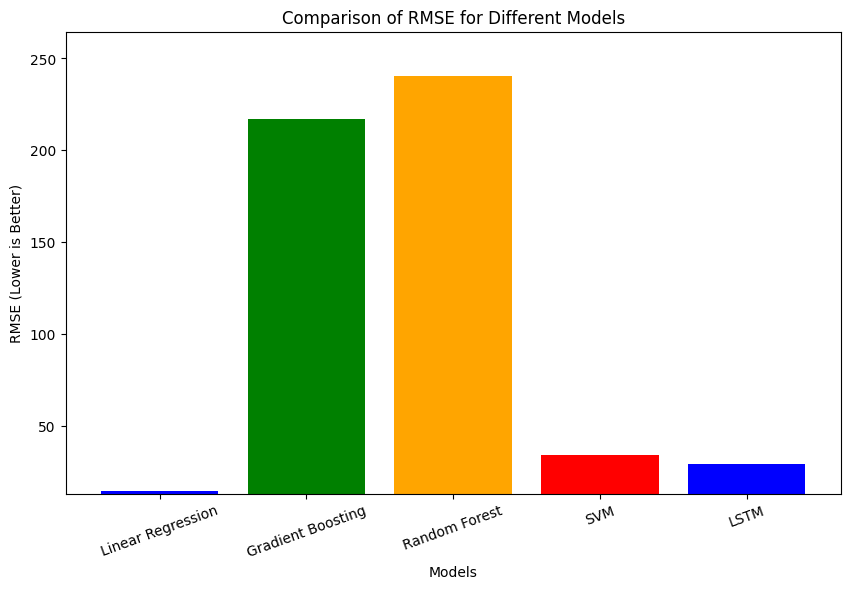

In [14]:
# RMSE values of all models
rmse_values = {
    "Linear Regression": rmse_lr,
    "Gradient Boosting": rmse_gb,
    "Random Forest": rmse_rf,
    "SVM": rmse_svm,
    "LSTM":rmse_lstm
}

# Plot the RMSE values
plt.figure(figsize=(10, 6))
plt.bar(rmse_values.keys(), rmse_values.values(), color=['blue', 'green', 'orange', 'red'])

# Formatting
plt.xlabel("Models")
plt.ylabel("RMSE (Lower is Better)")
plt.title("Comparison of RMSE for Different Models")
plt.ylim(min(rmse_values.values()) * 0.9, max(rmse_values.values()) * 1.1)  # Adjust y-axis
plt.xticks(rotation=20)

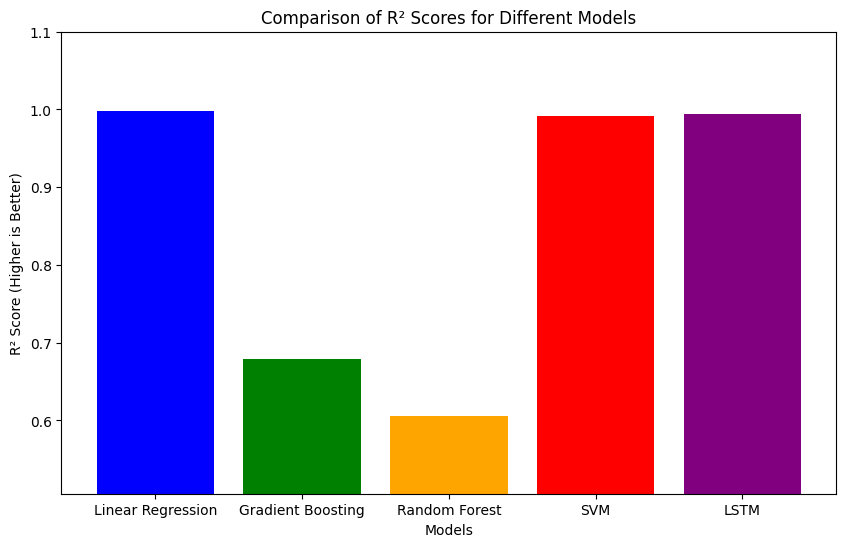

In [15]:
# R² values of all models
r2_values = {
    "Linear Regression": r2_lr,
    "Gradient Boosting": r2_gb,
    "Random Forest": r2_rf,
    "SVM": r2_svm,
    "LSTM": r2_lstm
}

# Plot the R² values
plt.figure(figsize=(10, 6))
plt.bar(r2_values.keys(), r2_values.values(), color=['blue', 'green', 'orange', 'red', 'purple'])

# Formatting
plt.xlabel("Models")
plt.ylabel("R² Score (Higher is Better)")
plt.title("Comparison of R² Scores for Different Models")
plt.ylim(min(r2_values.values()) - 0.1, 1.1)  # Adjust y-axis to show variation

plt.show()

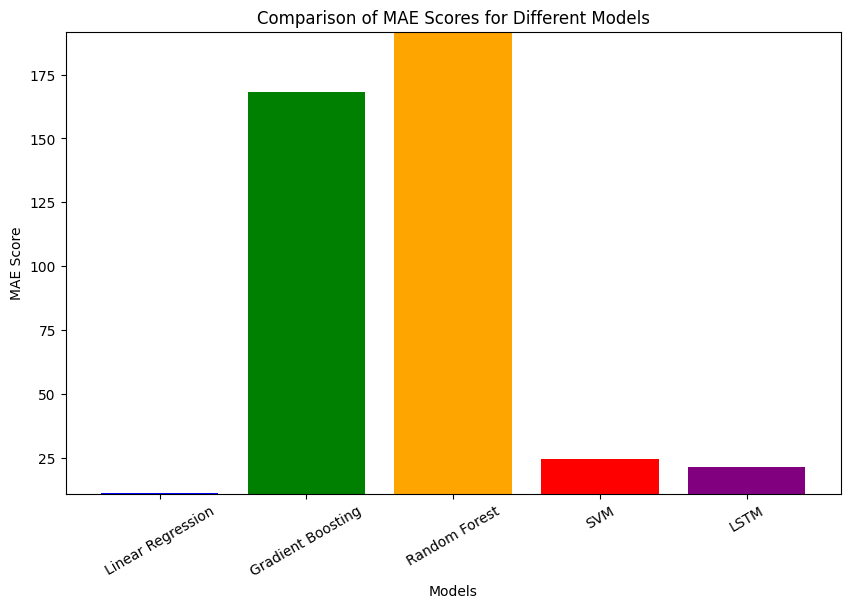

In [16]:
# MAE values of all models
mae_values = {
    "Linear Regression": mae_lr,
    "Gradient Boosting": mae_gb,
    "Random Forest": mae_rf,
    "SVM": mae_svm,
    "LSTM": mae_lstm
}

# Plot the MAE values
plt.figure(figsize=(10, 6))
plt.bar(mae_values.keys(), mae_values.values(), color=['blue', 'green', 'orange', 'red', 'purple'])

# Formatting
plt.xlabel("Models")
plt.ylabel("MAE Score")
plt.title("Comparison of MAE Scores for Different Models")
plt.xticks(rotation=30)  # Rotate labels for better visibility
plt.ylim(min(mae_values.values()) - 0.1, max(mae_values.values()) + 0.1)  # Dynamically adjust y-axis

# Show plot
plt.show()

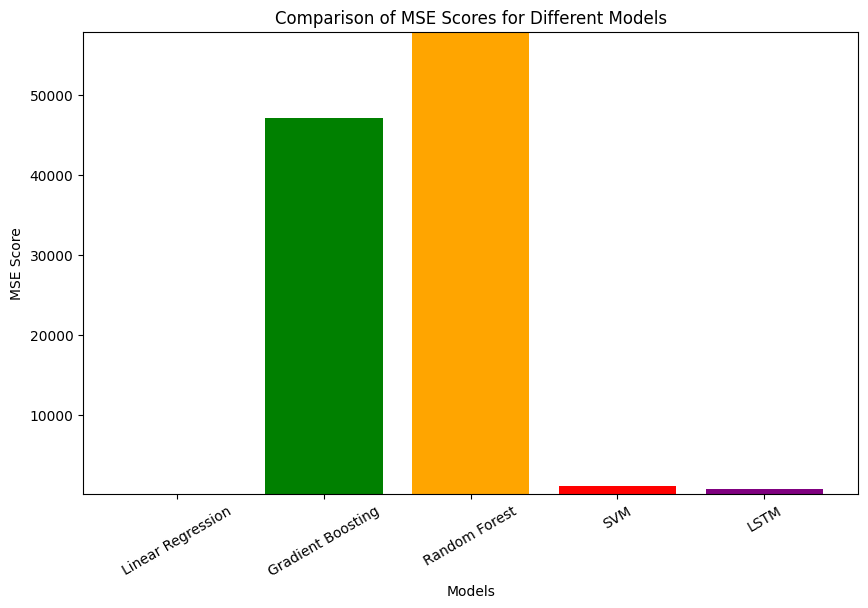

In [17]:
# MSE values of all models
mse_values = {
    "Linear Regression": mse_lr,
    "Gradient Boosting": mse_gb,
    "Random Forest": mse_rf,
    "SVM": mse_svm,
    "LSTM": mse_lstm
}

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.bar(mse_values.keys(), mse_values.values(), color=['blue', 'green', 'orange', 'red', 'purple'])

# Formatting
plt.xlabel("Models")
plt.ylabel("MSE Score")
plt.title("Comparison of MSE Scores for Different Models")
plt.xticks(rotation=30)  # Rotate labels for better visibility
plt.ylim(min(mse_values.values()) - 0.1, max(mse_values.values()) + 0.1)  # Dynamically adjust y-axis

# Show plot
plt.show()


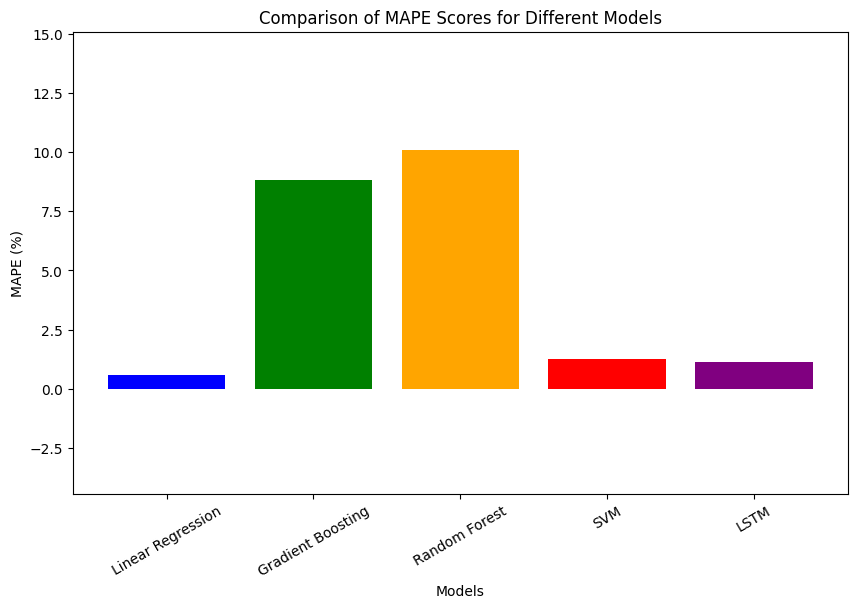

In [18]:
# MAPE values of all models
mape_values = {
    "Linear Regression": mape_lr,
    "Gradient Boosting": mape_gb,
    "Random Forest": mape_rf,
    "SVM": mape_svm,
    "LSTM": mape_lstm
}

# Plot the MAPE values
plt.figure(figsize=(10, 6))
plt.bar(mape_values.keys(), mape_values.values(), color=['blue', 'green', 'orange', 'red', 'purple'])

# Formatting
plt.xlabel("Models")
plt.ylabel("MAPE (%)")  # MAPE is a percentage
plt.title("Comparison of MAPE Scores for Different Models")
plt.xticks(rotation=30)  # Rotate labels for better readability
plt.ylim(min(mape_values.values()) - 5, max(mape_values.values()) + 5)  # Adjust y-axis dynamically

# Show plot
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Train base models (except LSTM)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Train LSTM model separately
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=16, verbose=0)
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

# Stack the predictions of all base models (including LSTM)
stacked_predictions = np.column_stack([y_pred_lr, y_pred_gb, y_pred_rf, y_pred_svm, y_pred_lstm])

# Train the meta-model using these stacked predictions
meta_model = LinearRegression()
meta_model.fit(stacked_predictions, y_test)

# Make final predictions using the stacked predictions
final_predictions = meta_model.predict(stacked_predictions)

# Calculate regression metrics for the ensemble model
mse_ensemble = mean_squared_error(y_test, final_predictions)
rmse_ensemble = np.sqrt(mse_ensemble)
mae_ensemble = mean_absolute_error(y_test, final_predictions)
r2_ensemble = r2_score(y_test, final_predictions)
mape_ensemble = np.mean(np.abs((y_test - final_predictions) / y_test)) * 100  # MAPE formula

# Print ensemble model metrics
print(f'Ensemble - Mean Squared Error (MSE): {mse_ensemble}')
print(f'Ensemble - Root Mean Squared Error (RMSE): {rmse_ensemble}')
print(f'Ensemble - Mean Absolute Error (MAE): {mae_ensemble}')
print(f'Ensemble - Mean Absolute Percentage Error (MAPE): {mape_ensemble:.2f}%')
print(f'Ensemble - R² Score: {r2_ensemble}')


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Ensemble - Mean Squared Error (MSE): 181.29478359988488
Ensemble - Root Mean Squared Error (RMSE): 13.464575136256059
Ensemble - Mean Absolute Error (MAE): 10.030018154524429
Ensemble - Mean Absolute Percentage Error (MAPE): 0.53%
Ensemble - R² Score: 0.9987647330904581


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Define the base models (no LSTM)
base_models = [
    ('lr', LinearRegression()),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)),
    ('svm', SVR(kernel='rbf', C=100, gamma=0.1))
]

# Meta-model (Linear Regression)
meta_model = LinearRegression()

# Create the stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Make predictions using the stacking model
y_pred_stacking = stacking_model.predict(X_test_scaled)

# Calculate regression metrics for the stacked model
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)
mape_stacking = np.mean(np.abs((y_test - y_pred_stacking) / y_test)) * 100  # MAPE formula

# Print stacking model metrics
print(f'Stacking - Mean Squared Error (MSE): {mse_stacking}')
print(f'Stacking - Root Mean Squared Error (RMSE): {rmse_stacking}')
print(f'Stacking - Mean Absolute Error (MAE): {mae_stacking}')
print(f'Stacking - Mean Absolute Percentage Error (MAPE): {mape_stacking:.2f}%')
print(f'Stacking - R² Score: {r2_stacking}')


Stacking - Mean Squared Error (MSE): 239.1242783004852
Stacking - Root Mean Squared Error (RMSE): 15.463643758845624
Stacking - Mean Absolute Error (MAE): 11.68085357710787
Stacking - Mean Absolute Percentage Error (MAPE): 0.61%
Stacking - R² Score: 0.9983707070750333
